## Analysis and Quantification of Enamel STEM Images

- 

In [1]:
#Dependencies
%matplotlib nbagg
import matplotlib.pyplot as plt
import ncempy.io as nio

<IPython.core.display.Javascript object>


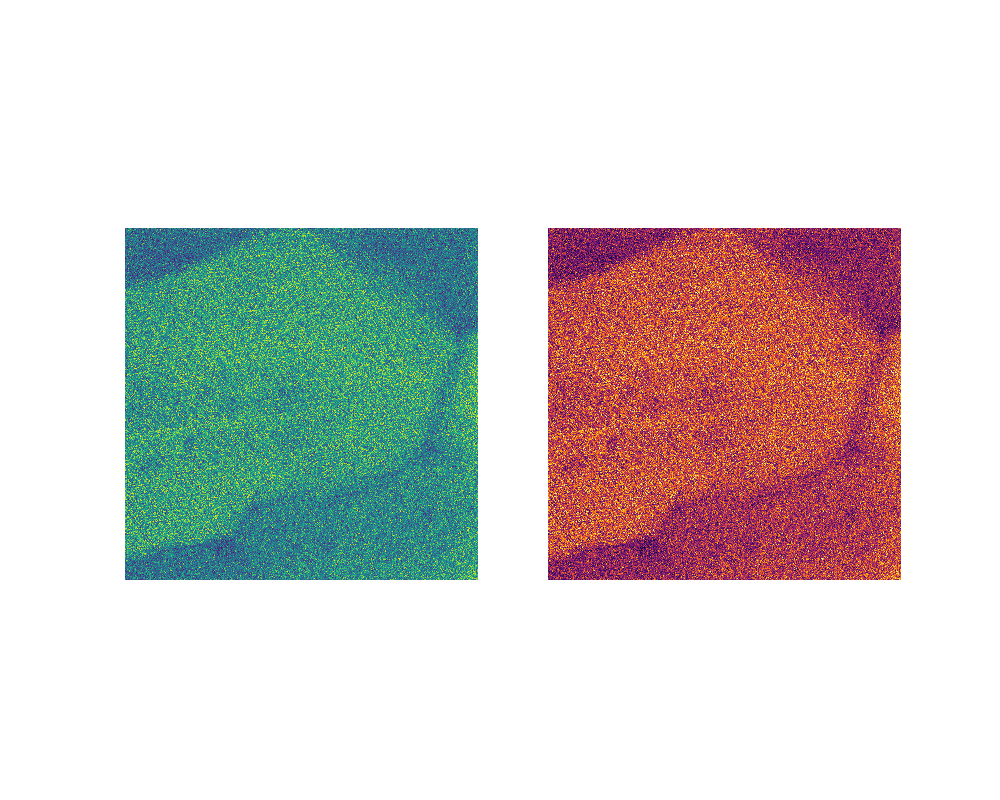

In [2]:
filename = 'images/21_2.55Mxx_1x1us_4096px_mono60_50umC2_1.ser'

with nio.ser.fileSER(filename) as ser1:
        data, metadata = ser1.getDataset(0)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

ax1.matshow(data)
ax2.matshow(data, cmap=plt.cm.inferno)

ax1.axis('off')
ax2.axis('off')

plt.show()

In [3]:
metadata

{'Calibration': ({'CalibrationOffset': -1.8982972830255405e-08,
   'CalibrationDelta': 9.269029702273147e-12,
   'CalibrationElement': 0},
  {'CalibrationOffset': -1.8982972830255405e-08,
   'CalibrationDelta': 9.269029702273147e-12,
   'CalibrationElement': 0}),
 'DataType': 2,
 'ArrayShape': [4096, 4096]}

In [4]:
# Filtering
import numpy as np
from scipy import ndimage

data_med = ndimage.median_filter(data, 3)

<IPython.core.display.Javascript object>


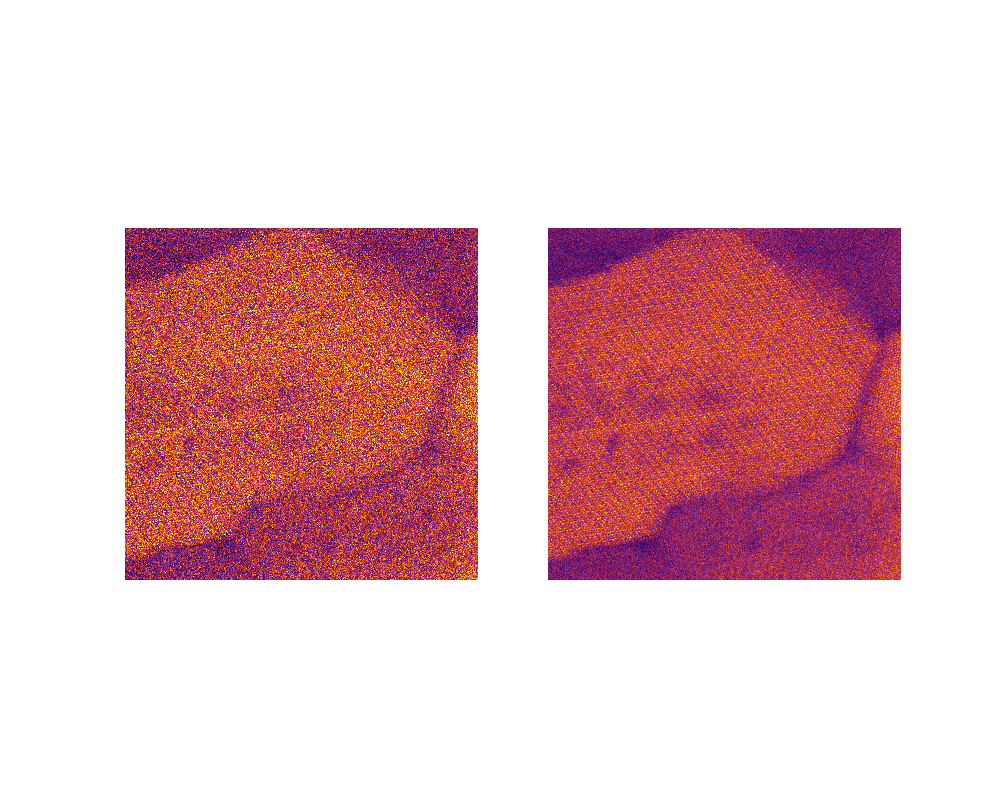

In [5]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))

ax1.matshow(data, cmap=plt.cm.inferno)
ax2.matshow(data_med, cmap=plt.cm.inferno)

ax1.axis('off')
ax2.axis('off')

plt.show()

In [6]:
from scipy import fftpack
data_fft = fftpack.fft2(data)
data_med_fft = fftpack.fft2(data_med)
im = 'images/24_3.6Mxx_1x1us_2048px_mono60_50umC2_1.ser'


# Show the results

def plot_spectrum(data_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(data_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

<IPython.core.display.Javascript object>


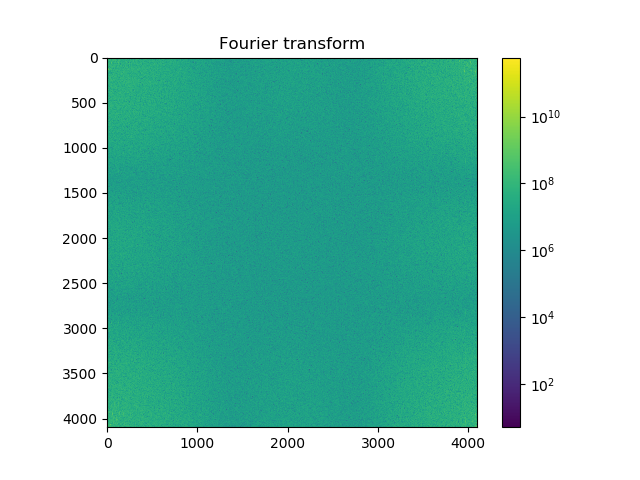

Text(0.5, 1.0, 'Fourier transform')

In [7]:
plt.figure()
plot_spectrum(data_med_fft,)
plt.title('Fourier transform')

<IPython.core.display.Javascript object>


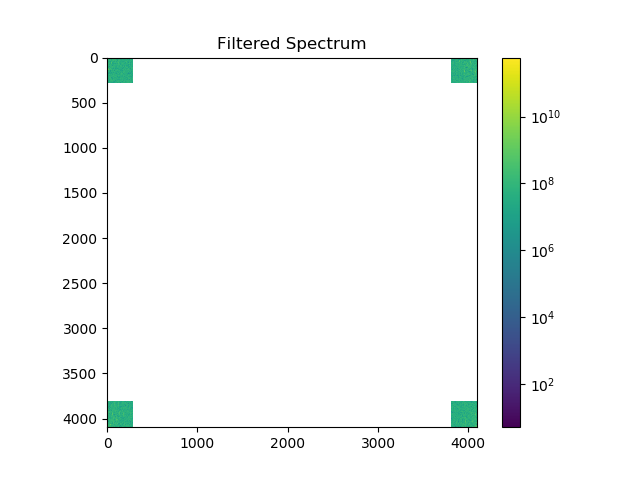

Text(0.5, 1.0, 'Filtered Spectrum')

In [17]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.07

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
data_fft2 = data_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = data_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
data_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
data_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(data_fft2)
plt.title('Filtered Spectrum')

<IPython.core.display.Javascript object>


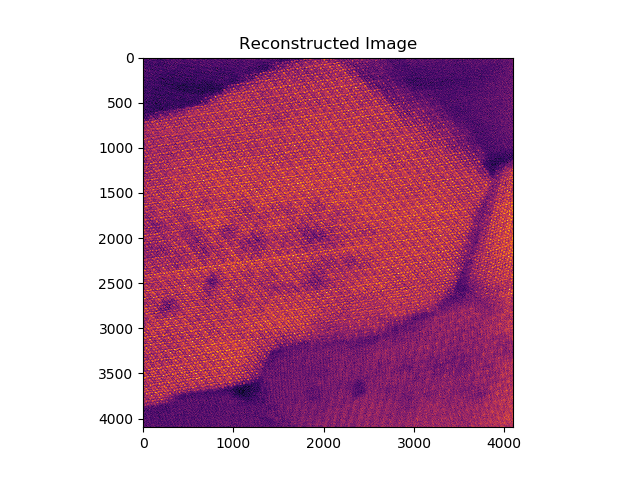

Text(0.5, 1.0, 'Reconstructed Image')

In [18]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
data_new = fftpack.ifft2(data_fft2).real

plt.figure()
plt.imshow(data_new, cmap=plt.cm.inferno)
plt.title('Reconstructed Image')

In [19]:
plt.savefig('C:/Users/pault/Desktop/Enamel 4D-STEM/analyzed images/21filtered.tif', transparent=True, dpi=1200)